In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math as mt
from scipy import stats as st
import seaborn as sns

# Project Description

You work as an analyst for the telecom operator **Megaline**. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans is more profitable in order to adjust the advertising budget.
You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze clients' behavior and determine which prepaid plan is more profitable.

**Description of the plans**

Note: Megaline rounds seconds up to minutes, and megabytes to gigabytes. For calls, each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute. For web traffic, individual web sessions are not rounded up. Instead, the total for the month is rounded up. If someone uses 1025 megabytes this month, they will be charged for 2 gigabytes.

**Surf**
1. Monthly charge: $20
2. 500 monthly minutes, 50 texts, and 15 GB of data
3. After exceeding the package limits:

    * 1 minute: 3 cents
    * 1 text message: 3 cents
    * 1 GB of data: $10

**Ultimate**
1. Monthly charge: $70
2. 3000 monthly minutes, 1000 text messages, and 30 GB of data
3. After exceeding the package limits:

    * 1 minute: 1 cent
    * 1 text message: 1 cent
    * 1 GB of data: $7


## Question: 

## WHICH PREPAID PLAN (SURF OR ULTIMATE) IS MORE PROFITABLE FOR MEGALINE?

## Objectives

* Analyze client behavior
* Answer "which prepaid plan is more profitable?". Megaline will adjust advertising budget accordingly

## Agenda

* Step 1: Upload and preview 2018 data provided from a sample of 500 customers
* Step 2: Prepare and clean data for analysis
* Step 3: Analyze the date. Extract insights on customer behavior for each plan.
* Step 4: Test two hypotheses:
    * The average prodit from users of Ultimate and Surf plans differs
    * The average profit from users in NY-NJ area is different than users from other regions.
* Step 5: Communicate to Megaline on which prepaid plan is more profitable and insights discovered along the way

#  Step 1: Data Input and Preview

In [2]:
calls = pd.read_csv('./megaline_calls.csv')
internet = pd.read_csv('./megaline_internet.csv')
messages = pd.read_csv('./megaline_messages.csv')
plans = pd.read_csv('./megaline_plans.csv')
users = pd.read_csv('./megaline_users.csv')

In [3]:
calls.head(3)

,id,user_id,call_date,duration
0,1000_93,1000,12/27/2018,8.52
1,1000_145,1000,12/27/2018,13.66
2,1000_247,1000,12/27/2018,14.48


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
id           137735 non-null object
user_id      137735 non-null int64
call_date    137735 non-null object
duration     137735 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Note - call date is wrong data type

Remember - As per brief, each call must be rounded up to minute

In [5]:
len(calls)

137735

In [6]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


note calls with 0 minutes.

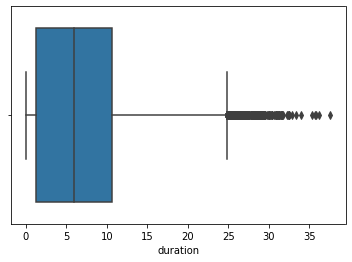

In [7]:
sns.boxplot(x=calls['duration'])

From describe, we can see big jump from 75% data to max and with boxplot, we can now confirm. calls duration has outliers

In [8]:
calls.isna().sum()

id           0
user_id      0
call_date    0
duration     0
dtype: int64

In [9]:
# is call id unique? 

calls.id.nunique() == len(calls)

True

In [10]:
#how many users in calls? 

calls.user_id.nunique()

481

In [11]:
internet.head(3)

,id,user_id,session_date,mb_used
0,1000_13,1000,12/29/2018,89.86
1,1000_204,1000,12/31/2018,0.00
2,1000_379,1000,12/28/2018,660.40


In [12]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
id              104825 non-null object
user_id         104825 non-null int64
session_date    104825 non-null object
mb_used         104825 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Session date is wrong data type

In [13]:
len(internet)

104825

In [14]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Note 0 mb used

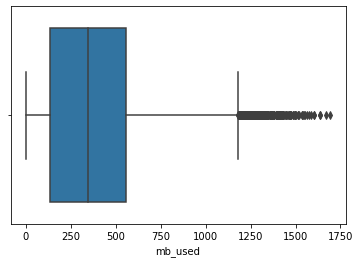

In [15]:
sns.boxplot(x=internet['mb_used'])

From describe, we can see big jump from 75% data to max and with boxplot, we can now confirm. internet mb_used has outliers

In [16]:
internet.isna().sum()

id              0
user_id         0
session_date    0
mb_used         0
dtype: int64

In [17]:
# is internet id unique? 

internet.id.nunique() == len(internet)

True

In [18]:
#how many users using internet? 

internet.user_id.nunique()

489

In [19]:
messages.head(3)

,id,user_id,message_date
0,1000_125,1000,12/27/2018
1,1000_160,1000,12/31/2018
2,1000_223,1000,12/31/2018


In [20]:
len(messages)

76051

In [21]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
id              76051 non-null object
user_id         76051 non-null int64
message_date    76051 non-null object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


message date is wrong data type

In [22]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


In [23]:
messages.isna().sum()

id              0
user_id         0
message_date    0
dtype: int64

In [24]:
# is message id unique? 

messages.id.nunique() == len(messages)

True

In [25]:
#how many users using messages? 

messages.user_id.nunique()

402

In [26]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [27]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
usd_monthly_pay          2 non-null int64
usd_per_gb               2 non-null int64
usd_per_message          2 non-null float64
usd_per_minute           2 non-null float64
plan_name                2 non-null object
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [28]:
users.head(3)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",12/24/2018,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",8/13/2018,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",10/21/2018,surf,NaN


In [29]:
len(users)

500

In [30]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


reg date is wrong data type

In [31]:
users.isna().sum()

user_id         0
first_name      0
last_name       0
age             0
city            0
reg_date        0
plan            0
churn_date    466
dtype: int64

In [32]:
users['churn_date'].value_counts().head(3)

12/18/2018    3
12/19/2018    2
12/31/2018    2
Name: churn_date, dtype: int64

In [33]:
# % users without a churn date? Assumption: that did not churned
users['churn_date'].isna().sum()/len(users)

0.932

churn date is wrong data type but 7% users have this field null. I will assume churn date is filled IF the customer churned

In [34]:
# CURRENT CHURN RATE 
(len(users) - users['churn_date'].isna().sum())/len(users)

0.068

**The current churn rate is 6.8%** These are customers who churn by the end of the calendar year when they joined

In [35]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


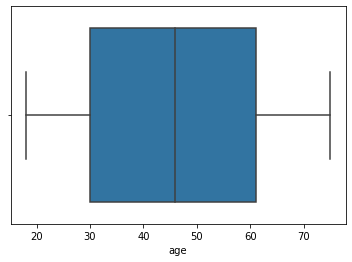

In [36]:
sns.boxplot(x=users['age'])

In [37]:
# is user id unique? 

users.user_id.nunique() == len(users)

True

In [38]:
users['city'].value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Albany-Schenectady-Troy, NY MSA                     1
Raleigh-Cary, NC MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
Jacksonville, FL MSA                                1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Name: city, Length: 73, dtype: int64

Would like to extract state from city but city includes region which will make it more challenging to use

### Step 1 Conclusion

Below are the items I will take a closer look and/or fix in next step (Data Preprocessing):

* make everything lower case, just in case.
* rename ambiguous columns expecting merge later: calls.id, internet.id, messages.id.users.city
* calls.call_date has wrong data type
* calls: note calls with 0 minutes
* calls: duration has outliers / extremes
* internet.session_date has wrong data type
* internet: note internet sessions with 0 megabytes used
* internet: mb_used has outliers / extremes
* message.date is wrong data type
* quality check date fields to be corrected
* customer reg date has wrong data type
* customer churn rate: wrong data type AND mostly null


Keep in Mind
* plans - remember rounding up for charges as described
* we have 500 users but not all are using services. Consumption of paid services should be looked at.
* users.city does not contain city data only. It could also be region.

#  Step 2: Data Pre-processing

* Convert the data to the necessary types
* Find and eliminate errors in the data

Explain what errors you found and how you removed them.
For each user, find:

* The number of calls made and minutes used per month
* The number of text messages sent per month
* The volume of data per month
* The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)


In [39]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
first_name    500 non-null object
last_name     500 non-null object
age           500 non-null int64
city          500 non-null object
reg_date      500 non-null object
plan          500 non-null object
churn_date    34 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [40]:
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,12/27/2018,8.52
1,1000_145,1000,12/27/2018,13.66
2,1000_247,1000,12/27/2018,14.48
3,1000_309,1000,12/28/2018,5.76
4,1000_380,1000,12/30/2018,4.22


In [41]:
# Just in case, make everything lower case

users['first_name'] = users['first_name'].str.lower()
users['last_name'] = users['last_name'].str.lower()
users['city'] = users['city'].str.lower()
users['plan'] = users['plan'].str.lower()
plans['plan_name'] = plans['plan_name'].str.lower()
messages['id'] = messages['id'].str.lower()
internet['id'] = internet['id'].str.lower()
calls['id'] = calls['id'].str.lower()

In [42]:
#confirm lower case in users.plan and plans.plan_name (the most likely join in string)
users.head(1)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",12/24/2018,ultimate,NaN


In [43]:
plans.head(1)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


In [44]:
#rename ambiguous columns
calls.rename(columns={"id": "call_id"}, inplace=True)
messages.rename(columns={"id": "message_id"}, inplace=True)
internet.rename(columns={"id": "internet_session_id"}, inplace=True)
users.rename(columns={"city": "user_city_or_region"}, inplace=True)

In [45]:
#confirm name changes
print(calls.columns)
print(messages.columns)
print(internet.columns)
print(users.columns)

Index(['call_id', 'user_id', 'call_date', 'duration'], dtype='object')
Index(['message_id', 'user_id', 'message_date'], dtype='object')
Index(['internet_session_id', 'user_id', 'session_date', 'mb_used'], dtype='object')
Index(['user_id', 'first_name', 'last_name', 'age', 'user_city_or_region',
       'reg_date', 'plan', 'churn_date'],
      dtype='object')


In [46]:
#correct date fields from "object" to timestamps
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'], errors='coerce') # errors = 'coerce due to nulls'

In [47]:
#Confirm date fields corrected
print('CALLS----------------')
print(calls.dtypes)
print('INTERNET---------------')
print(internet.dtypes)
print('MESSAGES---------------')
print(messages.dtypes)
print('USERS----------------')
print(users.dtypes)

CALLS----------------
call_id              object
user_id               int64
call_date    datetime64[ns]
duration            float64
dtype: object
INTERNET---------------
internet_session_id            object
user_id                         int64
session_date           datetime64[ns]
mb_used                       float64
dtype: object
MESSAGES---------------
message_id              object
user_id                  int64
message_date    datetime64[ns]
dtype: object
USERS----------------
user_id                         int64
first_name                     object
last_name                      object
age                             int64
user_city_or_region            object
reg_date               datetime64[ns]
plan                           object
churn_date             datetime64[ns]
dtype: object


In [48]:
# user data available
print('First user registration: ',users['reg_date'].min())
print('Last user registration: ',users['reg_date'].max())

First user registration:  2018-01-01 00:00:00
Last user registration:  2018-12-31 00:00:00


We can now see this is data for all users registered (acquired) in 2018

In [49]:
#check if dates are logical. Any clearly wrong years?
users['reg_date'].describe()

count                     500
unique                    266
top       2018-07-12 00:00:00
freq                        5
first     2018-01-01 00:00:00
last      2018-12-31 00:00:00
Name: reg_date, dtype: object

In [50]:
internet['session_date'].describe()

count                  104825
unique                    351
top       2018-12-24 00:00:00
freq                      851
first     2018-01-15 00:00:00
last      2018-12-31 00:00:00
Name: session_date, dtype: object

In [51]:
messages['message_date'].describe()

count                   76051
unique                    351
top       2018-12-28 00:00:00
freq                      702
first     2018-01-15 00:00:00
last      2018-12-31 00:00:00
Name: message_date, dtype: object

In [52]:
calls['call_date'].describe()

count                  137735
unique                    351
top       2018-12-27 00:00:00
freq                     1091
first     2018-01-15 00:00:00
last      2018-12-31 00:00:00
Name: call_date, dtype: object

In [53]:
users['churn_date'].describe()

count                      34
unique                     29
top       2018-12-18 00:00:00
freq                        3
first     2018-07-31 00:00:00
last      2018-12-31 00:00:00
Name: churn_date, dtype: object

Wrong date types corrected. We knew data represented customers acquired in 2018 and also services provided in 2018. **Question**: We are undoubtedly providing services in 2018 to customers who registered before unless this is a brand new company which launched in 2018 which is not stated in the description. Hence, we should confirm in EDA that we have service data ONLY for customers registered in 2018 (especially before a merge is attempted). As this is the case, a **limitation** of this analysis is that it will ONLY provide information on the pattern of new users until the end of the calendar year when they registered.



**Next:** I will plan out usage of the churn date column despite being mostly nulls. I'm **assuming**, the field is null if the customer did not churn. Hence, I will create a boolean 'churned?' column for all users. For users that churned, I am still keeping the churn date and creating a 'days before churn' column despite both of these being mostly null. With this handling, we can group all users between churned and unchurned to understand their patterns. In EDA, churned customers will be isolated and the two fields with nulls will be valuable then. 




**ASSUMPTION:** It is strange to see that despite customers having customers starting from January 1st, the first usage of messages, calls, and internet starts on January 15th. This could be an error. I will assume it it not as maybe it takes that long for service to start. Moving forward, this means that there is only **January** data for half the month. 



In [54]:
users['churned?'] = np.where(users['churn_date'].isna() == False, 1, 0)

In [55]:
users.head()

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaT,0
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaT,0


In [56]:
users['churned?'].value_counts()

0    466
1     34
Name: churned?, dtype: int64

In [57]:
users['days_before_churn'] = np.where(users['churn_date'].isna() == False, (users['churn_date']-users['reg_date']).dt.days, np.nan)

In [58]:
# for date type of users['days_before)_churn'] I expect float which should remain this way as there are nulls
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id                500 non-null int64
first_name             500 non-null object
last_name              500 non-null object
age                    500 non-null int64
user_city_or_region    500 non-null object
reg_date               500 non-null datetime64[ns]
plan                   500 non-null object
churn_date             34 non-null datetime64[ns]
churned?               500 non-null int32
days_before_churn      34 non-null float64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(4)
memory usage: 37.2+ KB


In [59]:
users['days_before_churn'].describe()

count     34.000000
mean     141.647059
std       88.464984
min        7.000000
25%       59.000000
50%      152.000000
75%      200.250000
max      313.000000
Name: days_before_churn, dtype: float64

In [60]:
#cofirm same nulls in churn date as new days before churn
users['days_before_churn'].isna().sum() == users['churn_date'].isna().sum()

True

In [61]:
users.head()

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaT,0,NaN
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaT,0,NaN


In [62]:
# note field has to stay float as it was nulls. These churned customers will be isolated in EDA and hence nulls will be left.
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id                500 non-null int64
first_name             500 non-null object
last_name              500 non-null object
age                    500 non-null int64
user_city_or_region    500 non-null object
reg_date               500 non-null datetime64[ns]
plan                   500 non-null object
churn_date             34 non-null datetime64[ns]
churned?               500 non-null int32
days_before_churn      34 non-null float64
dtypes: datetime64[ns](2), float64(1), int32(1), int64(2), object(4)
memory usage: 37.2+ KB


In [63]:
users['days_before_churn'].describe()

count     34.000000
mean     141.647059
std       88.464984
min        7.000000
25%       59.000000
50%      152.000000
75%      200.250000
max      313.000000
Name: days_before_churn, dtype: float64

In [64]:
users.isna().sum()

user_id                  0
first_name               0
last_name                0
age                      0
user_city_or_region      0
reg_date                 0
plan                     0
churn_date             466
churned?                 0
days_before_churn      466
dtype: int64

**Next** I will remove the calls with 0 duration and the internet sessions with 0 mb used. These don't reflect usage and have $0  value as based on the description there isnt a connection fee. Just a rate for the call time and GB of internet. 

In [65]:
calls.columns

Index(['call_id', 'user_id', 'call_date', 'duration'], dtype='object')

In [66]:
internet.columns

Index(['internet_session_id', 'user_id', 'session_date', 'mb_used'], dtype='object')

In [67]:
#%calls that will be dropped?
len(calls.loc[calls['duration']==0]) / len(calls)

0.1948233927469416

In [68]:
#% internet sessions that will be drooped?
len(internet.loc[internet['mb_used']==0]) / len(internet)

0.1311423801574052

In [69]:
calls = calls.loc[calls['duration']>0]
internet = internet.loc[internet['mb_used']>0]

In [70]:
#confirn minimum of these fields is no longer 0
print(calls['duration'].min() > 0)
print(internet['mb_used'].min() > 0)

True
True


**Next:** I will remove the outliers in call duration and internet mb_used as these extremes are not representative of overall user patterns

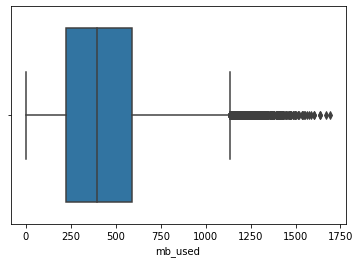

In [71]:
# Are there still outliers in internet mb_used?
sns.boxplot(x=internet['mb_used'])

In [72]:
Q1 = internet['mb_used'].quantile(0.25)
Q3 = internet['mb_used'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  223.38
Q3:  588.3675000000001
IQR:  364.98750000000007


In [73]:
bottom_cutoff = Q1 - (1.5*IQR)
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  1135.84875


In [74]:
#How % internet users reach extreme usage?
outliers_internet = internet.query('mb_used > @top_cutoff')
len(outliers_internet) / len(internet)

0.007158699137003448

Now we know the top of the boxplot was 1135mb which means there are users with extreme internet usage. It seems **less than 1% users reach extreme internet usage**. These outliers are on the top side which is actually good news for Megaline as these users could be incurring a lot of extra fees and we want to make sure those are included in our analysis.

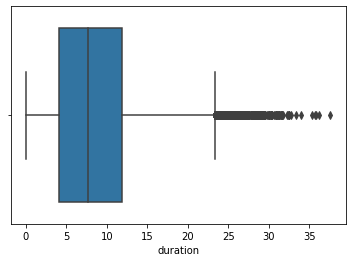

In [75]:
# Are there still outliers in call duration?
sns.boxplot(x=calls['duration'])

In [76]:
Q1 = calls['duration'].quantile(0.25)
Q3 = calls['duration'].quantile(0.75)
IQR = Q3 - Q1
print('Q1: ', Q1)
print('Q3: ', Q3)
print('IQR: ', IQR)

Q1:  4.15
Q3:  11.82
IQR:  7.67


In [77]:
top_cutoff = Q3 + 1.5 * IQR
if bottom_cutoff < 0:
    bottom_cutoff = 0
print('min: ',bottom_cutoff)
print('max: ',top_cutoff)

min:  0
max:  23.325


In [78]:
#How % call users reach extreme usage?
outliers_calls = calls.query('duration > @top_cutoff')
len(outliers_calls) / len(calls)

0.008187482529463216

Now we know the top of the boxplot was about 23 minutes which means there are users with extreme call usage above this. It seems **less than 1% users reach extreme call usage**. These outliers are on the top side which (although not many) is actually good news for Megaline as these users could be incurring a lot of extra fees and we want to make sure those are included in our analysis.

**Data Cleaning is finished** Before the next step, some transformation is needed to have user-level data which is now displayed in multiple dataframes

 Adding "The number of calls made and minutes used per month"

In [79]:
users.head()

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN
3,1003,reynaldo,jenkins,52,"tulsa, ok msa",2018-01-28,surf,NaT,0,NaN
4,1004,leonila,thompson,40,"seattle-tacoma-bellevue, wa msa",2018-05-23,surf,NaT,0,NaN


In [80]:
calls.head()

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


let's first have a boolean that checks if the user made any calls

In [81]:
users['made_calls?'] = np.where(users['user_id'].isin(calls['user_id']) == True, 1, 0)

In [82]:
users.head(2)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1


In [83]:
#confirm boolean created?
users['made_calls?'].value_counts()

1    481
0     19
Name: made_calls?, dtype: int64

I will be doing left joins on users. Let's first confirm that all user ids in calls are inside "users"

In [84]:
#If all values true, all user ids in call exist in the users table
calls['ready_for_join'] = calls['user_id'].isin(users['user_id'])
calls['ready_for_join'].value_counts()

True    110901
Name: ready_for_join, dtype: int64

In [85]:
calls.drop(['ready_for_join'], axis=1, inplace=True)

In [86]:
calls.head(3)

,call_id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48


In [87]:
#now that we confirmed all user ids in calls inside users. Let's group calls data as needed.

#number of calls made my month
calls['call_month'] = calls['call_date'].dt.month
groupby = calls.groupby(['user_id','call_month'])['duration'].count().groupby(['user_id']).mean().astype(int).to_frame().reset_index()
groupby.rename(columns={'duration':'avg_monthly_calls'},inplace=True)
groupby

,user_id,avg_monthly_calls
0,1000,16
1,1001,40
2,1002,31
3,1003,118
4,1004,38
...,...,...
476,1495,52
477,1496,31
478,1497,42
479,1498,33


In [88]:
# add to users table. confirm avg monthly calls in users table

users = pd.merge(users, groupby, how='left', on='user_id')
users.head(3)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1,40.0
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN,1,31.0


In [89]:
# % nulls in new column. If greater than 0, consider how to handle nulls at end of step
users['avg_monthly_calls'].isna().sum() / len(users)

0.038

In [90]:
calls.head()

,call_id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [91]:
#minutes used per month

# Note - calls rounded up. 
calls['duration'] = calls['duration'].apply(np.ceil).astype(int)
calls.head()

,call_id,user_id,call_date,duration,call_month
0,1000_93,1000,2018-12-27,9,12
1,1000_145,1000,2018-12-27,14,12
2,1000_247,1000,2018-12-27,15,12
3,1000_309,1000,2018-12-28,6,12
4,1000_380,1000,2018-12-30,5,12


As there are outliers in call duration, aggregate by median instead.

In [92]:
groupby = calls.groupby(['user_id','call_month'])['duration'].sum().groupby(['user_id']).median().astype(int).to_frame().reset_index()
groupby.rename(columns={'duration':'median_monthly_mins'},inplace=True)
groupby

,user_id,median_monthly_mins
0,1000,124
1,1001,393
2,1002,384
3,1003,1104
4,1004,359
...,...,...
476,1495,426
477,1496,308
478,1497,300
479,1498,288


In [93]:
# add to users table. confirm avg monthly minutes used
users = pd.merge(users, groupby, how='left', on='user_id')
users.head(3)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls,median_monthly_mins
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0,124.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1,40.0,393.0
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN,1,31.0,384.0


 Adding "The number of text messages sent per month"

In [94]:
messages.head(2)

,message_id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31


In [95]:
#check if all user ids in messages in users df

messages['ready_for_join'] = messages['user_id'].isin(users['user_id'])
messages['ready_for_join'].value_counts()

True    76051
Name: ready_for_join, dtype: int64

In [96]:
messages.drop(['ready_for_join'], axis=1, inplace=True)

In [97]:
messages.head(1)

,message_id,user_id,message_date
0,1000_125,1000,2018-12-27


Let's make a boolean in users that checks if the user has sent any messages

In [98]:
users['used_messages?'] = np.where(users['user_id'].isin(messages['user_id']) == True, 1, 0)

In [99]:
users.head(2)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls,median_monthly_mins,used_messages?
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0,124.0,1
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1,40.0,393.0,1


In [100]:
#confirm boolean created?
users['used_messages?'].value_counts()

1    402
0     98
Name: used_messages?, dtype: int64

In [101]:
#now that we confirmed all user ids in messages inside users. Let's group calls data as needed.

#number of text messages made my month for each user
messages['message_month'] = messages['message_date'].dt.month
groupby = messages.groupby(['user_id','message_month'])['message_id'].count().groupby(['user_id']).mean().astype(int).to_frame().reset_index()
groupby.rename(columns={'message_id':'avg_monthly_messages'},inplace=True)
groupby.head()

,user_id,avg_monthly_messages
0,1000,11
1,1001,41
2,1002,29
3,1003,50
4,1004,22


In [102]:
# add to users table. confirm avg monthly minutes used
users = pd.merge(users, groupby, how='left', on='user_id')
users.head(3)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls,median_monthly_mins,used_messages?,avg_monthly_messages
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0,124.0,1,11.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1,40.0,393.0,1,41.0
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN,1,31.0,384.0,1,29.0


 Adding "The volume of data per month"

In [103]:
internet.head(2)

,internet_session_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
2,1000_379,1000,2018-12-28,660.40


In [104]:
#check if all user ids in internet in users df

internet['ready_for_join'] = internet['user_id'].isin(users['user_id'])
internet['ready_for_join'].value_counts()

True    91078
Name: ready_for_join, dtype: int64

In [105]:
internet.drop(['ready_for_join'], axis=1, inplace=True)

In [106]:
internet.head(1)

,internet_session_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86


Let's make a boolean in users that checks if the user has used any data

In [107]:
users['used_internet?'] = np.where(users['user_id'].isin(internet['user_id']) == True, 1, 0)

In [108]:
users.head(2)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls,median_monthly_mins,used_messages?,avg_monthly_messages,used_internet?
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0,124.0,1,11.0,1
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1,40.0,393.0,1,41.0,1


In [109]:
#confirm boolean created?
users['used_internet?'].value_counts()

1    489
0     11
Name: used_internet?, dtype: int64

In [110]:
internet.head(1)

,internet_session_id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86


In [111]:
#now that we confirmed all user ids in internet inside users. Let's group internet data as needed.

#megabytes used per month by user (NOTE, round up after monthly calculated)
internet['session_month'] = internet['session_date'].dt.month
internet['mb_used'] = internet['mb_used'].apply(np.ceil) # round up to mb before calculating monthly totals
groupby = internet.groupby(['user_id','session_month'])['mb_used'].sum() # calculating monthly totals
groupby = groupby / 1024 #divide by 1024 to get integer GB
groupby = groupby.apply(np.ceil) #round up to next GB
groupby = groupby.groupby(['user_id']).median().astype(int).to_frame().reset_index()
groupby.rename(columns={'mb_used':'median_monthly_gb'},inplace=True)
groupby.head()

,user_id,median_monthly_gb
0,1000,2
1,1001,19
2,1002,15
3,1003,27
4,1004,21


In [112]:
# add to users table. confirm avg monthly gb used
users = pd.merge(users, groupby, how='left', on='user_id')
users.head(3)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls,median_monthly_mins,used_messages?,avg_monthly_messages,used_internet?,median_monthly_gb
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0,124.0,1,11.0,1,2.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,1,40.0,393.0,1,41.0,1,19.0
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN,1,31.0,384.0,1,29.0,1,15.0


Adding "The monthly profit from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan)"

To do so, we need to merge with plans which includes pricing info

In [113]:
users.head(1)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,made_calls?,avg_monthly_calls,median_monthly_mins,used_messages?,avg_monthly_messages,used_internet?,median_monthly_gb
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,1,16.0,124.0,1,11.0,1,2.0


In [114]:
plans.head(1)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf


In [115]:
#Are plan names the same in plans and df?
plans['plan_name'].value_counts()

ultimate    1
surf        1
Name: plan_name, dtype: int64

In [116]:
plans.rename(columns = {'plan_name':'plan'},inplace=True)

In [117]:
users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

In [118]:
users = pd.merge(users, plans, how='left', on='plan')
users.head(3)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,...,avg_monthly_messages,used_internet?,median_monthly_gb,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,...,11.0,1,2.0,1000,30720,3000,70,7,0.01,0.01
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,...,41.0,1,19.0,50,15360,500,20,10,0.03,0.03
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN,...,29.0,1,15.0,50,15360,500,20,10,0.03,0.03


In [119]:
users['mb_per_month_included'].value_counts()

15360    339
30720    161
Name: mb_per_month_included, dtype: int64

In [120]:
users['minutes_included'].value_counts()

500     339
3000    161
Name: minutes_included, dtype: int64

In [121]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 24 columns):
user_id                  500 non-null int64
first_name               500 non-null object
last_name                500 non-null object
age                      500 non-null int64
user_city_or_region      500 non-null object
reg_date                 500 non-null datetime64[ns]
plan                     500 non-null object
churn_date               34 non-null datetime64[ns]
churned?                 500 non-null int32
days_before_churn        34 non-null float64
made_calls?              500 non-null int32
avg_monthly_calls        481 non-null float64
median_monthly_mins      481 non-null float64
used_messages?           500 non-null int32
avg_monthly_messages     402 non-null float64
used_internet?           500 non-null int32
median_monthly_gb        489 non-null float64
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 

In [122]:
users['gb_per_month_included'] = (users['mb_per_month_included']/1000).apply(np.floor).astype(int)

In [123]:
users['gb_per_month_included'].value_counts()

15    339
30    161
Name: gb_per_month_included, dtype: int64

Now that we have all the relevant fields in user df, we can calculate monthly profit

In [124]:
def monthly_price(row):
    
    monthly_charge = row['usd_monthly_pay']
    
    #call charge
    minutes = row['median_monthly_mins']
    extra_minutes_fee = row['usd_per_minute']
    minutes_included = row['minutes_included']
    if minutes > minutes_included:
        call_charge = (minutes - minutes_included) * extra_minutes_fee
    else:
        call_charge = 0
    
    #message charge
    messages = row['avg_monthly_messages']
    extra_msg_fee = row['usd_per_message']
    messages_included = row['messages_included']
    if messages > messages_included:
        message_charge = (messages - messages_included) * extra_msg_fee
    else:
        message_charge = 0
    
    #internet charge
    gb = row['median_monthly_gb']
    extra_gb_fee = row['usd_per_gb']
    gb_included = row['gb_per_month_included']
    if gb > gb_included:
        internet_charge = (gb - gb_included) * extra_gb_fee
    else:
        internet_charge = 0    
    
    #price
    price = monthly_charge + call_charge + message_charge + internet_charge
    return price

In [125]:
users['monthly_price'] = users.apply(monthly_price, axis=1)

In [126]:
users['monthly_price'].describe()

count    500.000000
mean      58.449280
std       38.403353
min       20.000000
25%       23.135000
50%       63.930000
75%       70.000000
max      316.240000
Name: monthly_price, dtype: float64

In [127]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 26 columns):
user_id                  500 non-null int64
first_name               500 non-null object
last_name                500 non-null object
age                      500 non-null int64
user_city_or_region      500 non-null object
reg_date                 500 non-null datetime64[ns]
plan                     500 non-null object
churn_date               34 non-null datetime64[ns]
churned?                 500 non-null int32
days_before_churn        34 non-null float64
made_calls?              500 non-null int32
avg_monthly_calls        481 non-null float64
median_monthly_mins      481 non-null float64
used_messages?           500 non-null int32
avg_monthly_messages     402 non-null float64
used_internet?           500 non-null int32
median_monthly_gb        489 non-null float64
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 

In [128]:
users.head(3)

,user_id,first_name,last_name,age,user_city_or_region,reg_date,plan,churn_date,churned?,days_before_churn,...,median_monthly_gb,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,gb_per_month_included,monthly_price
0,1000,anamaria,bauer,45,"atlanta-sandy springs-roswell, ga msa",2018-12-24,ultimate,NaT,0,NaN,...,2.0,1000,30720,3000,70,7,0.01,0.01,30,70.0
1,1001,mickey,wilkerson,28,"seattle-tacoma-bellevue, wa msa",2018-08-13,surf,NaT,0,NaN,...,19.0,50,15360,500,20,10,0.03,0.03,15,60.0
2,1002,carlee,hoffman,36,"las vegas-henderson-paradise, nv msa",2018-10-21,surf,NaT,0,NaN,...,15.0,50,15360,500,20,10,0.03,0.03,15,20.0


In [129]:
users.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 26 columns):
user_id                  500 non-null int64
first_name               500 non-null object
last_name                500 non-null object
age                      500 non-null int64
user_city_or_region      500 non-null object
reg_date                 500 non-null datetime64[ns]
plan                     500 non-null object
churn_date               34 non-null datetime64[ns]
churned?                 500 non-null int32
days_before_churn        34 non-null float64
made_calls?              500 non-null int32
avg_monthly_calls        481 non-null float64
median_monthly_mins      481 non-null float64
used_messages?           500 non-null int32
avg_monthly_messages     402 non-null float64
used_internet?           500 non-null int32
median_monthly_gb        489 non-null float64
messages_included        500 non-null int64
mb_per_month_included    500 non-null int64
minutes_included         500 

In [130]:
users['monthly_price'].describe()

count    500.000000
mean      58.449280
std       38.403353
min       20.000000
25%       23.135000
50%       63.930000
75%       70.000000
max      316.240000
Name: monthly_price, dtype: float64

In [131]:
users['extra_fees'] = users['monthly_price'] - users['usd_monthly_pay']

In [132]:
users['extra_fees'].describe()

count    500.000000
mean      22.349280
std       40.174029
min        0.000000
25%        0.000000
50%        0.135000
75%       30.510000
max      296.240000
Name: extra_fees, dtype: float64

In [133]:
users['pays_extra?'] = np.where(users['extra_fees']>0, True, False)

In [134]:
users.iloc[365]

user_id                                           1365
first_name                                     milford
last_name                                         rush
age                                                 19
user_city_or_region      grand rapids-kentwood, mi msa
reg_date                           2018-02-09 00:00:00
plan                                              surf
churn_date                                         NaT
churned?                                             0
days_before_churn                                  NaN
made_calls?                                          1
avg_monthly_calls                                  114
median_monthly_mins                               1102
used_messages?                                       1
avg_monthly_messages                                40
used_internet?                                       1
median_monthly_gb                                    7
messages_included                                   50
mb_per_mon

### Step 2 Conclusion

Below are the **Data Preprocessing** items accomplished in Step 2
* Made all string lower case
* Renamed ambiguous columns
* Corrected data type of date fields
* Corrected errors: calls with 0 minutes, internet sessions with 0 GB. We removed 19% call data and 13% internet session data.
* Prepared for joins (renaming columns and ensuring matching in both dataframes prior to join)
* Added Booleans to check if customers used call services, internet services, or text service at all.
* Extracted month from date fields
* Corrected differing units (MB to GB)

In this step, I also completed **Data Transformation** including relevant data pivots, joins, and functions to create fields below:
* Number of calls per month
* Minutes user per month
* Data used per month
* Text messages used per month
* Monthly charge

Below are some **questions & assumptions** to keep in mind for next steps:
* Unclear what this data represents. It seems to have all **activity in 2018 for customers who joined in 2018**. It excludes 2018 activity for customers that joined earlier. This seems a bit biased as how can we fairly compare customers with 12 months of transactions and others with less than 1. We have many more monthly data points for customers who joined earlier in the year than later. Ideally, we would keep only the first X months for all customers to fairly compare them.  
* “Monthly” refers to calendar month.
* A null churn_date means the customer is still active.
* We kept users who joined in December even though they won't have a full month of data.
* Usage starting January 15th is acceptable for the month of January

**Business Recommendation**:
* 19% calls had 0 duration and 13% internet had 0 GB. This needs investigation. Why is this happening? Is this an error? Is this a result of an intentional customer action (e.g. call, let it ring, and hang up)?

#  Step 3: Exploratory Data Analysis

Describe the customers' behavior. Find the minutes, texts, and volume of data the users of each plan require per month. Calculate the mean, variance, and standard deviation. Plot histograms. Describe the distributions.

In [135]:
users['plan'].value_counts(normalize=True)

surf        0.678
ultimate    0.322
Name: plan, dtype: float64

In 2018, **67% of Megaline customers chose the Surf Plan over the Ultimate plan**. Let's take a closer look how each plan is used

In [136]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'user_city_or_region',
       'reg_date', 'plan', 'churn_date', 'churned?', 'days_before_churn',
       'made_calls?', 'avg_monthly_calls', 'median_monthly_mins',
       'used_messages?', 'avg_monthly_messages', 'used_internet?',
       'median_monthly_gb', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'gb_per_month_included', 'monthly_price',
       'extra_fees', 'pays_extra?'],
      dtype='object')

In [137]:
surf = users.loc[users['plan']=='surf']
ultimate = users.loc[users['plan']=='ultimate']

In [138]:
#Does the compbination of surf & ultimate users dfs equal the total users? Expect: True
(len(surf) + len(ultimate)) == len(users)

True

#### Call Service

In [139]:
users['made_calls?'].value_counts(normalize=True)

1    0.962
0    0.038
Name: made_calls?, dtype: float64

In [140]:
users.groupby(['plan'])['made_calls?'].mean()

plan
surf        0.961652
ultimate    0.962733
Name: made_calls?, dtype: float64

96% users are using the call service, regardless of plan

In [141]:
users.groupby(['plan'])['median_monthly_mins'].mean()

plan
surf        438.763804
ultimate    431.329032
Name: median_monthly_mins, dtype: float64

In [142]:
users.groupby(['plan'])['median_monthly_mins'].median()

plan
surf        429.5
ultimate    432.0
Name: median_monthly_mins, dtype: float64

In [143]:
users.groupby(['plan'])['median_monthly_mins'].std()

plan
surf        204.279468
ultimate    208.238409
Name: median_monthly_mins, dtype: float64

Text(0.5, 1.0, 'Ultimate: Median Monthly Mins')

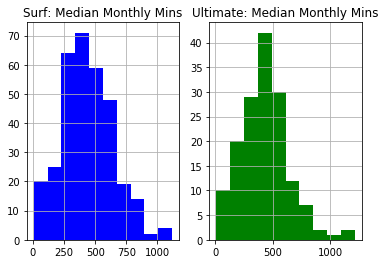

In [144]:
#Minutes by Plan
fig, axes = plt.subplots(1, 2)
surf['median_monthly_mins'].hist(ax=axes[0], color='blue')
ultimate['median_monthly_mins'].hist(ax=axes[1], color='green')

axes[0].set_title('Surf: Median Monthly Mins')
axes[1].set_title('Ultimate: Median Monthly Mins')

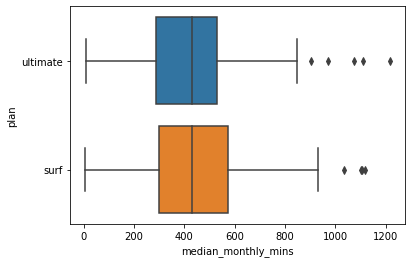

In [145]:
ax = sns.boxplot(y="plan", x="median_monthly_mins", data=users)

In [146]:
users['goes_over_calls?'] = users['median_monthly_mins'] > users['minutes_included']

In [147]:
users.groupby(['plan'])['goes_over_calls?'].mean()

plan
surf        0.353982
ultimate    0.000000
Name: goes_over_calls?, dtype: float64

The **minutes used per month are around 400 regardless which plan** which is below the includes minutes but **close to the limit for Surf users**.  Median (a better measure due to outliers) is about 3 minutes less for surf users but not the expected drastic differences. Both types of users seem to use the call service equally. The distribution of minutes used is more dispersed for Ultimate users than Surf ones which shows that surf users' call usage is more clustered around the median of 429. You have similar number of surf users right below and above the limit which indicates **surf users seem cognizant of this limit and try to stick to it, often unsuccessfully** going right above it. **Ultimate users are barely using their included service** considering 3000 minutes are included and they average around 400

Ultimate users never exceed their minutes includes but **35% Surf users exceed their monthly included minutes**.

#### Messages

In [148]:
users['used_messages?'].value_counts(normalize=True)

1    0.804
0    0.196
Name: used_messages?, dtype: float64

In [149]:
users.groupby(['plan'])['used_messages?'].mean()

plan
surf        0.796460
ultimate    0.819876
Name: used_messages?, dtype: float64

80% users use the messages service (less popular than call). Usage is slightly lower for surf users. 80% surf users used messages while 82% ultimate users used messages. Ultimate users are 2% more likely to used messaging service.

In [150]:
users.groupby(['plan'])['avg_monthly_messages'].median()

plan
surf        31.0
ultimate    43.0
Name: avg_monthly_messages, dtype: float64

In [151]:
users.groupby(['plan'])['avg_monthly_messages'].mean()

plan
surf        39.974074
ultimate    45.651515
Name: avg_monthly_messages, dtype: float64

In [152]:
users.groupby(['plan'])['avg_monthly_messages'].std()

plan
surf        29.739440
ultimate    30.843606
Name: avg_monthly_messages, dtype: float64

Text(0.5, 1.0, 'Ultimate: Avg Monthly Mgs')

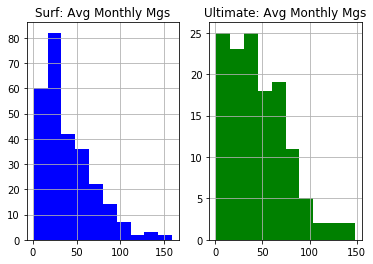

In [153]:
#Messages by Plan
fig, axes = plt.subplots(1, 2)
surf['avg_monthly_messages'].hist(ax=axes[0], color='blue')
ultimate['avg_monthly_messages'].hist(ax=axes[1], color='green')

axes[0].set_title('Surf: Avg Monthly Mgs')
axes[1].set_title('Ultimate: Avg Monthly Mgs')

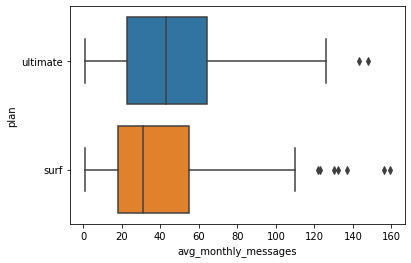

In [154]:
ax = sns.boxplot(y="plan", x="avg_monthly_messages", data=users)

In [155]:
users['goes_over_messages?'] = users['avg_monthly_messages'] > users['messages_included']
users.groupby(['plan'])['goes_over_messages?'].mean()

plan
surf        0.241888
ultimate    0.000000
Name: goes_over_messages?, dtype: float64

Although ultimate users do use more messages than surf users. The reality is that they both tend to stay below the messages allowed. **Ultimate users are barely using the 1000 messages allowed with a median of only 43 and never exceed their limit**.

**24% surf users exceed their included messages and incur fees.** Most likely because of the limit, the distribution of the number of messages used indicates that surf users tend to stay below or slightly above their limit while the distribution for ultimate users is more widely spread out and diverse.

In [156]:
users['used_internet?'].value_counts(normalize=True)

1    0.978
0    0.022
Name: used_internet?, dtype: float64

In [157]:
users.groupby(['plan'])['used_internet?'].mean()

plan
surf        0.979351
ultimate    0.975155
Name: used_internet?, dtype: float64

Around 97% users utilize internet service regardless of plan

In [158]:
users.groupby(['plan'])['median_monthly_gb'].median()

plan
surf        17.0
ultimate    16.0
Name: median_monthly_gb, dtype: float64

In [159]:
users.groupby(['plan'])['median_monthly_gb'].mean()

plan
surf        16.515060
ultimate    16.707006
Name: median_monthly_gb, dtype: float64

In [160]:
users.groupby(['plan'])['median_monthly_gb'].std()

plan
surf        6.326209
ultimate    6.318736
Name: median_monthly_gb, dtype: float64

Text(0.5, 1.0, 'Ultimate: Median Monthly GB')

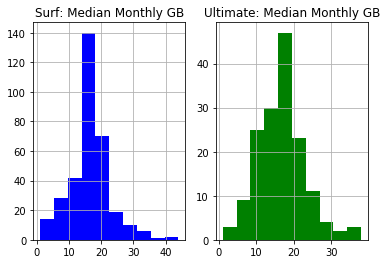

In [161]:
#GB by Plan
fig, axes = plt.subplots(1, 2)
surf['median_monthly_gb'].hist(ax=axes[0], color='blue')
ultimate['median_monthly_gb'].hist(ax=axes[1], color='green')

axes[0].set_title('Surf: Median Monthly GB')
axes[1].set_title('Ultimate: Median Monthly GB')

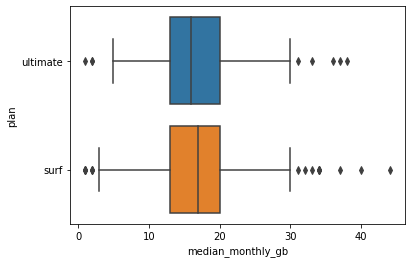

In [162]:
ax = sns.boxplot(y="plan", x="median_monthly_gb", data=users)

In [163]:
users['goes_over_internet?'] = users['median_monthly_gb'] > users['gb_per_month_included']
users.groupby(['plan'])['goes_over_internet?'].mean()

plan
surf        0.569322
ultimate    0.031056
Name: goes_over_internet?, dtype: float64

**Users use the same number of Gigabites**, regardless of plan. The median (a better measure due to outliers) of both is 16. This median is above the limit for surf users and way below ultimate. **Over 56% surf users go over the gb included and incur extra fees**. Meanwhile, **ultimate users utilize about half of the gb included**. 

As with messages, the distribution of the number of gb used indicates that surf users tend to stay around their limit with a bigger standard deviation while the distribution for ultimate users is more widely spread out and diverse.

#### Conclusion

In [164]:
#churn rate
users['churned?'].mean()

0.068

In [165]:
users.groupby(['plan'])['churned?'].mean()

plan
surf        0.067847
ultimate    0.068323
Name: churned?, dtype: float64

In [166]:
# number of days to churn (surf vs ultimate)
users.loc[users['churned?']==1].groupby('plan')['days_before_churn'].median()

plan
surf        141.0
ultimate    201.0
Name: days_before_churn, dtype: float64

In [167]:
201-141

60

In [168]:
# usual amount of extra fees paid. Would it be worth it to go for ultimate?
users.loc[users['extra_fees']>0]['extra_fees'].median()

30.445

In [169]:
# % users than incur extra fees
users['pays_extra?'].mean()

0.504

In [170]:
# % users that include extra fees by plan
users.groupby('plan')['pays_extra?'].mean()

plan
surf        0.728614
ultimate    0.031056
Name: pays_extra?, dtype: float64

In [171]:
# Do users that incur extra fees tend to churn more?
users.groupby(['plan', 'pays_extra?'])['churned?'].mean()

plan      pays_extra?
surf      False          0.076087
          True           0.064777
ultimate  False          0.070513
          True           0.000000
Name: churned?, dtype: float64

Overall, it seems that users from both plans tend to use our services the same regardless which plan they have. 

**Surf users (as their service includes less) are much more likely to exceed their inclusions** with 68% incurring exra fees (24% exceeding messages, 35% exceeding calls, and over 56% exceeding their internet service). There is potential we are making much more money from Surf users than ultimate users which we should test in the hypothesis stage next. Despite going over, **surf users dont have an incentive to  upgrade to the ultimate plan because the 50 USD additional in monthly charge is way more than the usual extra fees which have a median of 30 USD** bringing the total monthly pay to 50 USD rather than 70 USD. 

On the other hand, the limits from ultimate are very high and **ultimate users hardly ever reach their limits** or come close. Only about 1% ultimate users incur extra fees. There doesnt seem to be a high incentive in getting ultimate as users don't some close to their limit and hence it might not seem worth it to pay the extra 50 USD. 

Interestingly, **users have the same churn rate regardless of plan** but **surf users churn more quickly**, about 60 days earlier than ultimate users 

If we accept churn rate as a measure of customer satisfaction, it seems customers feel the same about either. The only thing Megaline should consider for more revenue is: **does it prefer money upfront in a monthly charge or is it happy going for a model with extra fees?**. If upfront, they should incentivize surf users to upgrade to ultimate for more money upfront. If extra fees, should they make fee charge more expensive or more likely? Both can be accomplished by updating the thresholds and/or rates. 

Of the services offered, call and internet service are the most widely used (96% and 97% users respectively). **20% users do not use messages at all.**. I **I recommend Megaline follows this project with another studying users not using all or some of the services offered**.

#  Step 4: Hypotheses Testing

* The average profit from users of Ultimate and Surf calling plans differs.
* The average profit from users in NY-NJ area is different from that of the users from other regions.

You decide what alpha value to use.
Explain:

* How you formulated the null and alternative hypotheses.
* What criterion you used to test the hypotheses and why.

### Hypothesis 1: The average profit from users of Ultimate and Surf calling plans differs.

The null hypothesis will be what we are trying to disprove, that the profits are the same. Hence:

* H0 (Null Hypothesis): Average Profit from Surf Users == Average Profit from Ultimate Users

* HA (Alternative Hypothesis): Average Profit from Surf Users != Average Profit from Ultimate Users

Confidence Level: 95% (Alpha 5%)

In [172]:
alpha = .05

results = st.ttest_ind(surf['monthly_price'], ultimate['monthly_price'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  2.8891863279720225e-07
We reject the null hypothesis


As the p-value is less than 0.05, there is a significant difference between the average monthly price of ultimate users vs surf users. Hence, we can reject the hypothesis that the profit between the two plans is the same and **accept the alternative hypoothesis that the average profit from users of ultimate and surf plans differs**.

Now, that we know there is a statistically significance amongst the monthly price of surf users vs ultimate users. Let's check which type of users pays more:

In [173]:
# Do surf users pay more than ultimate?

surf['monthly_price'].mean() > ultimate['monthly_price'].mean()

False

In [174]:
# Do ultimate users pay more than surf?

ultimate['monthly_price'].mean() > surf['monthly_price'].mean()

True

In conclusion, **ultimate users are more profitable than surf users**. The model of higher payment upfront and less likelihood of fees is more profitable for Megaline than a model with low upfront cost and high fees. 

### Hypothesis 2: The average profit from users in NY-NJ area is different from that of the users from other regions.

In [175]:
users.columns

Index(['user_id', 'first_name', 'last_name', 'age', 'user_city_or_region',
       'reg_date', 'plan', 'churn_date', 'churned?', 'days_before_churn',
       'made_calls?', 'avg_monthly_calls', 'median_monthly_mins',
       'used_messages?', 'avg_monthly_messages', 'used_internet?',
       'median_monthly_gb', 'messages_included', 'mb_per_month_included',
       'minutes_included', 'usd_monthly_pay', 'usd_per_gb', 'usd_per_message',
       'usd_per_minute', 'gb_per_month_included', 'monthly_price',
       'extra_fees', 'pays_extra?', 'goes_over_calls?', 'goes_over_messages?',
       'goes_over_internet?'],
      dtype='object')

In [176]:
users['user_city_or_region'].value_counts()

new york-newark-jersey city, ny-nj-pa msa          80
los angeles-long beach-anaheim, ca msa             29
dallas-fort worth-arlington, tx msa                21
chicago-naperville-elgin, il-in-wi msa             19
philadelphia-camden-wilmington, pa-nj-de-md msa    17
                                                   ..
albany-schenectady-troy, ny msa                     1
cape coral-fort myers, fl msa                       1
oxnard-thousand oaks-ventura, ca msa                1
jacksonville, fl msa                                1
greensboro-high point, nc msa                       1
Name: user_city_or_region, Length: 73, dtype: int64

In [177]:
# What is the NY-NJ area called? Look for "ny"
users['user_city_or_region'].loc[users['user_city_or_region'].str.contains('ny', regex=False)].value_counts()

new york-newark-jersey city, ny-nj-pa msa    80
san jose-sunnyvale-santa clara, ca msa        5
rochester, ny msa                             3
buffalo-cheektowaga, ny msa                   2
albany-schenectady-troy, ny msa               1
Name: user_city_or_region, dtype: int64

I will assume the NY-NJ area in question is the same as the "new york-newark-jersey city, ny-nj-pa msa" listed.

The null hypothesis will be what we are trying to disprove, that the profits are the same for the NY-NJ area than for not NY_NJ region. Hence:

* H0 (Null Hypothesis): Average Profit from NY-NJ-PA Users == Average Profit from NON NY-NJ-PA Users

* HA (Alternative Hypothesis): Average Profit from NY-NJ-PA Users != Average Profit from NON NY-NJ-PA Users

Confidence Level: 95% (Alpha 5%)

In [178]:
nynj = users.loc[users['user_city_or_region'] == 'new york-newark-jersey city, ny-nj-pa msa']
non_nynj = users.loc[users['user_city_or_region'] != 'new york-newark-jersey city, ny-nj-pa msa']

In [179]:
#confirm total users split in these two buckets
(len(nynj) + len(non_nynj)) == len(users)

True

In [180]:
alpha = .05

results = st.ttest_ind(nynj['monthly_price'], non_nynj['monthly_price'])

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
        print("We reject the null hypothesis")
else:
        print("We can't reject the null hypothesis")

p-value:  0.3420079558141169
We can't reject the null hypothesis


The p-value tells us that although average monthly price for users within the NY_NJ region and users without are different, there is a 33% probability of randomly getting a difference that size or larger and hence it is not statistically significant as it is above 5%. Hence, we can't reject the null hypothesis that there is not a difference among the two groups and **we can't accept the alternative hypothesis that there is a significant difference among NY-NJ user and non NY-NJ users.** 

#  Step 5: Conclusion

As an analyst for Megaline, I was given data for 500 users acquired in 2018 and their activity that same year and tasked with **two objectives** as follows:

* Analyze client behavior
* Answer "which prepaid plan is more profitable?". Megaline will adjust advertising budget accordingly

Below are **INSIGHTS** discovered regarding **client behavior**:
* Surf and Ultimate users utilize the services similarly despite having different coverage. 
* Surf and Ultimate users churn at the same rate (6.8%), but surf users churn more quickly (about 2 months earlier)
* The Surf plan is more popular. 68% users are on the Surf plan and 32% on the Ultimate plan.
* Ultimate users under-utilize the services included and are very unlikely to incur extra fees (only 3% ultimate users go over their internet usage)
* Surf users are more likely to incur extra fees in internet (over 56% surf users) than either calls (35% of surf users) or messages (24% of surf users). Overall, 72% surf users have incurred extra fees.
* Surf users tend to be very cognizant of their limits as most users' monthly activity hover around it (sometimes unsuccessfully), particularly on call and internet service 
* Users tend to use call and internet service (used by 96% and 97% users respectively) but less likely to use messages with 20% users who have never used message service. 
* As internet is the only service type both users go over, Megaline is best positioned to make revenue from internet fees.
* As inquired, there is no evidence proving there is a statistically significant difference in the monthly profit between users from the NY-NJ region compared to users from other regions


**ANSWER: WHICH PREPAID PLAN IS MORE PROFITABLE?**

**The ultimate plan is more profitable for Megaline than the surf plan**. Although surf users are much more likely to incur extra fees (72% percent vs 3% for ultimate), these fees around 30 USD are much less than the 50 USD extra in monthly charge ultimate users pay. Hence, marketing should push the ultimate plan in favor of the surf plan.



**PROJECT LIMITATION(S)**:
* This study only looks at customers acquired in 2018 and their activity by the end of the calendar year they joined (12/31/2018). Hence, I had more data on customers the earlier they joined in the year. If there is reason to suspect the month the customer signed up has an effect on behavior, more research is advised.  


**ADDITIONAL BUSINESS RECOMMENDATIONS**
* Megaline is currently collecting a strange mix of city and regions for each user which is stored in the **'city' field**. It would be much easier to parse through if Megaline had a city and state fields. Regions could easily be formed combining the states. Why is this important? For example, Megaline had an interest in the NY-NJ region but the current region set up includes PA so I was forced to include PA data in the analysis. The separate fields would have solved this.
* 19% calls had a duration of **0 minutes** and 13% internet sessions used **0 MB**. Megaline should look into why as there is possiblity of lost revenue. Is this an intentional action from the customer to save on fees? An alternative to solve would be to charge a **connection fee** in which these 0 value calls and internet sessions would yield revenue. 
* Although churn rate is the same for both, the fact that **surf users churn much more quickly is something of concern**. Here, we looked at monthly revenue but surf users tend to 2 less months as a customer than ultimate users. 2 less months of monthly charge and fees. Megaline should consider an initiative to improve this metric (perhaps consider a third tier in the middle?). 


